# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df_io = pd.read_csv(r'C:\Users\octav\Desktop\2. Objetivos especificos\9. Programación\DA\Proyecto\instacart_orders.csv', sep = ';') 
df_p = pd.read_csv(r'C:\Users\octav\Desktop\2. Objetivos especificos\9. Programación\DA\Proyecto\products.csv', sep = ';')
df_ais = pd.read_csv(r'C:\Users\octav\Desktop\2. Objetivos especificos\9. Programación\DA\Proyecto\aisles.csv', sep = ';')
df_dep = pd.read_csv(r'C:\Users\octav\Desktop\2. Objetivos especificos\9. Programación\DA\Proyecto\departments.csv', sep = ';')
df_op = pd.read_csv(r'C:\Users\octav\Desktop\2. Objetivos especificos\9. Programación\DA\Proyecto\order_products.csv', sep = ';')

In [3]:
# mostrar información del DataFrame
df_io.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_op.info()
#df_op.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Todos los data frames se dividian por ';' por lo que se lee declarando sep=';', los data frames tienen los valores en cada columna salvo aquellos data frames con muchos renglones que su tipo de elemento es flotante (days_since_prior_order) y de objeto(product_name), que lleva a pensar que puede haber valores con 0 o de plano vacios. En el data frame para order product al ser muy extensa no mostraba la columna de conteo 'Non-Null Count', por lo que recurrí al método notnull y sum para contar los valores que no sean nulos comprobando que igualmente en elementos float64(add_to_cart_order) hay valores nulos. 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

En instacart_orders
Revisaría si se repiten los Order_id de cada pedido, para verificar que no se repitan. Si se repiten probablemente porque en el número de veces que el cliente ha hecho un pedido se actualice con cada pedido. 

En products, aisles y departments
Revisaría si se repiten el id de identificación única. Si se repite alguno significa que se duplicó el ID en alguno de los dataframes.

En order_products
Revisar el id unico de cada pedido, el orden secuencia pudo haber duplicado valores si se hicieron varios pedidos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
# Encontrar la suma total de lineas duplicadas.
print(df_io.duplicated().sum())
#Analizar las lineas duplicadas para encontrar un patróm en los pedidos duplicados.
print(df_io[df_io.duplicated()])
#Guardar una variable con el valor de las id's de las ordenes duplicadas.
order_dub = sorted(df_io[df_io.duplicated()]['order_id'])
print(order_dub)

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
#Sí, la mayoría de los duplicados se hicieron el miércoles a las 2 am 
# Revisar 
# Crear una variable que tenga todos los pedidos que se hicieron el miércoles a las 2 am
pedidos_mier_2 = df_io[(df_io['order_dow']==3) & (df_io['order_hour_of_day']==2)]
# Ordenar los valores de id's order para observar si hay un patrón en los duplicados
print(sorted(pedidos_mier_2['order_id']))
print('')
print(pedidos_mier_2)
print('')
# Use la variable order_dub con los id's orders duplicados para observar todos los pedidos repetidos.
string_q = 'order_id in @order_dub'
df_filtered = pedidos_mier_2.query(string_q)
print(df_filtered)
print('')
# Use el método value counts en los id users para observar cuantas veces se duplicaron los valores duplicados.
#Lo que me lleva a pensar que todas las entradas del miércoles a las 2 am se duplicaron 1 vez indistintamente del usuario.
print(df_filtered['user_id'].value_counts().sum())
print(df_filtered['user_id'].value_counts())
 

[191, 222962, 238782, 248760, 264348, 272079, 284770, 332561, 350018, 353088, 382357, 391768, 391768, 401662, 404972, 408114, 408114, 449909, 467134, 467134, 494201, 508008, 522496, 553049, 577527, 592699, 593561, 596062, 632042, 690242, 736983, 738145, 774488, 781491, 794638, 794638, 819551, 851025, 898850, 908991, 910166, 1021560, 1021560, 1090993, 1099720, 1112182, 1112182, 1121635, 1135733, 1171914, 1211189, 1219044, 1286742, 1286742, 1353704, 1378085, 1395560, 1399416, 1453300, 1477271, 1496645, 1525566, 1542137, 1554296, 1645769, 1680532, 1725788, 1725841, 1761462, 1782114, 1782114, 1833869, 1918001, 1918001, 1919531, 1919531, 1958044, 1983940, 2025848, 2027608, 2061573, 2125197, 2125197, 2132617, 2160484, 2160484, 2190225, 2218116, 2232988, 2232988, 2282673, 2282673, 2291746, 2425457, 2429224, 2438538, 2547119, 2592344, 2593771, 2602339, 2625221, 2665629, 2677202, 2725375, 2766110, 2767450, 2800415, 2845099, 2845099, 2846262, 2851380, 2893503, 2908154, 2934579, 3149961, 3155527,

¿Qué sugiere este resultado?
Que el pedido de ese día de duplicó 1 vez, afectando a 15 usuarios únicos.

In [10]:
# Elimina los pedidos duplicados
df_io_sin_duplicados = df_io.drop_duplicates().reset_index(drop=True)
print(df_io_sin_duplicados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Vuelve a verificar si hay filas duplicadas
new_df_io = df_io_sin_duplicados.duplicated().sum()
print(new_df_io)

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_io_sin_duplicados['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Me dispuse a analizar el dataframe de instacart_orders, encontre que los pedidos que corresponden al miércoles a las 2 am afectando a 15 usuarios diferentes pero todos con solo una copia, después de cerciorar que los duplicados tuvieran un patrón procedí a eliminar los duplicados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_p_duplicados = df_p.duplicated().sum()
print(df_p_duplicados)

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
df_p_duplicados_id_dep = df_p['department_id'].duplicated().sum()
print(df_p_duplicados_id_dep)

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_p['product_name'] = df_p['product_name'].str.upper()
print(df_p['product_name'].duplicated().sum())





1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Se extraen los valores para los que si haya un valor en product_name
df_p_pnf = df_p[~df_p['product_name'].isna()]
# Se utiliza el método duplicated para sumar los duplicados de este data frame
print(df_p_pnf['product_name'].duplicated().sum())
#Se imprime los valores que se repiten
print(df_p_pnf[df_p_pnf['product_name'].duplicated()])
#Se imprime los valores de uno de los productos repetidos para observar si tienen similitudes.
valor_id_2059 = df_p[df_p['product_name']=='BIOTIN 1000 MCG']
print('\n')
print(valor_id_2059)
print('\n')
df_p_na = df_p[df_p['product_name'].isna()]
df_p_na.info()
#Se podría cambiar el nombre de los productos sin nombre con el nombre de 'UNKNOWN'
#df_p['product_name'] = df_p['product_name'].fillna('UNKNOWN')
#Se serciora 

104
       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058        

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al analizar el duplicado completo de los nombres de producto nos dimos cuenta que los 1361 valores que arrojan se componen de 104 valores que bien tienen el mismo nombre pero tiene un product_id diferente, puesto que no conocemos cual id es el correcto mantendremos ambos productos. Y otras 1258 entradas con nada en su nombre, por lo que podríamos cambiar estos por algún parametro como 'unknown'

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_dep_duplicados = df_dep.duplicated().sum()
print(df_dep_duplicados)

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
df_dep_duplicados_id = df_dep['department_id'].duplicated().sum()
print(df_dep_duplicados_id)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Ningún departamente se repite completamente, de igual manera ningún id se repite, por lo que deje el dataframe sin cambios.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_ais_duplicados = df_ais.duplicated().sum()
print(df_ais_duplicados)

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_ais_duplicados_id = df_ais['aisle_id'].duplicated().sum()
print(df_ais_duplicados_id)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_op_duplicados = df_op.duplicated().sum()
print(df_op_duplicados)

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Revisé cuántos valores de order_id y product_id se repiten
df_op_duplicado_o_id = df_op['order_id'].duplicated().sum()
df_op_duplicado_p_id = df_op['product_id'].duplicated().sum()
print(df_op_duplicado_o_id)
print(df_op_duplicado_p_id)
# Después de observar que se duplican varios valores, tome un order_id para
#observar estos casos en particular,
print(df_op[df_op['order_id']==61355])
#Al observar el orden secuencial analize que la única manera de observar
#un duplicado engañoso sería si se repitiera el orden secuencial en conjunto
#con el order id.
#Sume los duplicados en donde la secuencia add_to_cart_order se repite.
print('')
duplicados_sorpresa = df_op.duplicated(subset=['order_id', 'add_to_cart_order'], keep=False)
print(df_op[duplicados_sorpresa])
print('')
#Verifique si faltaban valores en la secuencia utilizando restando 
# la lista de nuemeros que debería haber menos los número que realmente tenemos
faltantes = df_op.groupby('order_id')['add_to_cart_order'].apply(lambda x: set(range(1, len(x) + 1))-set(x))
#Filtre solo los valores order_id con valores faltantes.
faltantes =faltantes[faltantes.apply(len) > 0]
print(faltantes)
print('')
#Convertí la serie a DataFrame para acceder a los order_id que me interesen
faltantes_df = faltantes.reset_index()
print(faltantes_df.loc[faltantes_df['order_id']==9310, 'add_to_cart_order'])
#Finalmente ordene los valores dentro de cada order_id para que esten
#ordenados correctamente según el add_to_cart_order
df_op = df_op.sort_values(by =['order_id', 'add_to_cart_order'])
print(df_op)

4094961
4499434
         order_id  product_id  add_to_cart_order  reordered
57981       61355        5322                NaN          0
149404      61355       39475               45.0          0
247893      61355        8594                NaN          0
269840      61355       14233                5.0          0
345399      61355       24010               51.0          0
...           ...         ...                ...        ...
4426514     61355       29270               15.0          0
4482168     61355       24964               33.0          0
4515077     61355        6760               27.0          0
4521208     61355       16262               62.0          0
4525165     61355       24561               54.0          0

[127 rows x 4 columns]

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Después de realizar un analisis exaustivo del orden secuencial, se obtuvieron las ordenes donde se presentaban valores que faltaban en la secuencia, con alta probabilidad que los valores ausenten contengan NaN.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_p_ausentes = df_p[df_p['product_name'].isna()]
print(df_p_ausentes)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Se encontraron un gran número de productos sin nombre exactamente 1258 filas, todas parecieran estar vinculadas a la categoría 100 y al departamento 21.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_p_ausentes['aisle_id'].value_counts())

100    1258
Name: aisle_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.
En efecto, todos los nombres de productos ausentes se encuentran en el aisle 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_p_ausentes['department_id'].value_counts())

21    1258
Name: department_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.
Igualmente, todos los nombres de productos ausentes están relacionados con el departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_p_100_21= df_p[(df_p['aisle_id']==100) & (df_p['department_id']==21)]
print(df_p_100_21)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Todos los valores de este departamente son los mismos para todos los nombres de productos ausentes.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_p['product_name'] = df_p['product_name'].fillna('Unknown')
print(df_p['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_io_ausentes = df_io[df_io.isna()]
print(df_io_ausentes)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0            NaN      NaN           NaN        NaN                NaN   
1            NaN      NaN           NaN        NaN                NaN   
2            NaN      NaN           NaN        NaN                NaN   
3            NaN      NaN           NaN        NaN                NaN   
4            NaN      NaN           NaN        NaN                NaN   
...          ...      ...           ...        ...                ...   
478962       NaN      NaN           NaN        NaN                NaN   
478963       NaN      NaN           NaN        NaN                NaN   
478964       NaN      NaN           NaN        NaN                NaN   
478965       NaN      NaN           NaN        NaN                NaN   
478966       NaN      NaN           NaN        NaN                NaN   

        days_since_prior_order  
0                          NaN  
1                          NaN  
2                       

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_io.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al parecer de las entradas que se tienen del data frame se ingresa una linea sin ningún valor.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_op_ausentes = df_op.isna().sum()
print(df_op_ausentes)
 
#df_op = df_op.dropna(subset= ['order_id'])
 
df_op.info()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 311805 to 4473670
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 173.4 MB


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_op['add_to_cart_order'].min(), df_op['add_to_cart_order'].max())
# El minimo es 1 y el valor máximo es 64

1.0 64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_perdidos = df_op[df_op['add_to_cart_order'].isna()]
print(ids_perdidos)

         order_id  product_id  add_to_cart_order  reordered
2437093      9310       25753                NaN          0
57981       61355        5322                NaN          0
247893      61355        8594                NaN          0
381535      61355       12315                NaN          0
399791      61355       10199                NaN          0
...           ...         ...                ...        ...
1038616   3383594       15424                NaN          1
1537276   3383594       15076                NaN          0
2772397   3383594       46710                NaN          0
3760909   3383594          63                NaN          0
3784932   3383594       49144                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
lost_mergered = ids_perdidos.merge(df_op, left_on='order_id',right_on='order_id')
print(lost_mergered)
count_product = lost_mergered.groupby('order_id')['product_id_y'].count()
print()
print(count_product)
print()
#Obtención del conteo mínimo de conteo.
min_count = count_product.min()
print(min_count)

       order_id  product_id_x  add_to_cart_order_x  reordered_x  product_id_y  \
0          9310         25753                  NaN            0         32578   
1          9310         25753                  NaN            0         20082   
2          9310         25753                  NaN            0         27966   
3          9310         25753                  NaN            0         18523   
4          9310         25753                  NaN            0         42828   
...         ...           ...                  ...          ...           ...   
74963   3383594         49144                  NaN            1         15424   
74964   3383594         49144                  NaN            1         15076   
74965   3383594         49144                  NaN            1         46710   
74966   3383594         49144                  NaN            1            63   
74967   3383594         49144                  NaN            1         49144   

       add_to_cart_order_y 

Describe brevemente cuáles son tus hallazgos.
Se observa que apartir del producto 65 se comienza a no registrar los valores secuenciales de adquisión al carrito.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_op['add_to_cart_order'] = df_op['add_to_cart_order'].fillna('999')
df_op['add_to_cart_order'].str
df_op.info()
df_op.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 311805 to 4473670
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  object
 3   reordered          int64 
dtypes: int64(3), object(1)
memory usage: 173.4+ MB


order_id             4545007
product_id           4545007
add_to_cart_order    4545007
reordered            4545007
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se llenaron los valores vacíos de la columna add_to_cart_order para que tengan un valor y el dataframe de "order products" dejara de tener valores nulos. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
El preprocesamiento de datos empieza en la visualización de los DataFrame donde se comienza a procesar los datos nulos de las diferentes columnas y dar un sentido a los datos, esto con el proposito de empezar a realizar proposiciones en base a ellos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
valores_hora = df_io['order_hour_of_day'].value_counts().sort_index()
print(valores_hora)

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [36]:
valores_dias = df_io['order_dow'].value_counts().sort_index()
print(valores_dias)

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


Escribe aquí tus conclusiones. Los valores para las horas y los días es consistente. Por lo cuál las conclusiones que se obtengan a partir de ahora esta lectura retrospectiva es altamente probable, por lo tanto, debe ser discutida y analizada, puesto que el estudio del comportamiento de compra de los usuarios como eje estructurante y sistemático sirve a la toma de decisiones.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

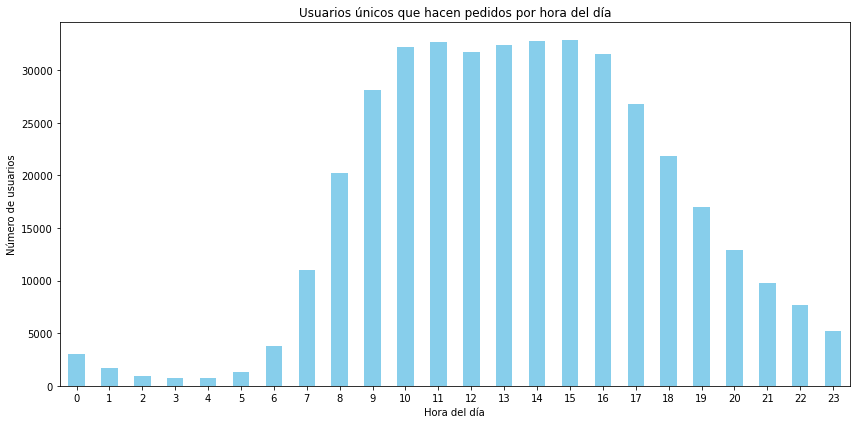

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
orden_por_horas = df_io.groupby('order_hour_of_day')['user_id'].nunique()
orden_por_horas.plot(kind='bar', color= 'skyblue')
plt.title('Usuarios únicos que hacen pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de usuarios')
plt.xticks(rotation =0)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
Con la gráfica se observa que hay un tráfico mayor de usuarios entre las 10h y 16h.

### [A3] ¿Qué día de la semana compran víveres las personas?

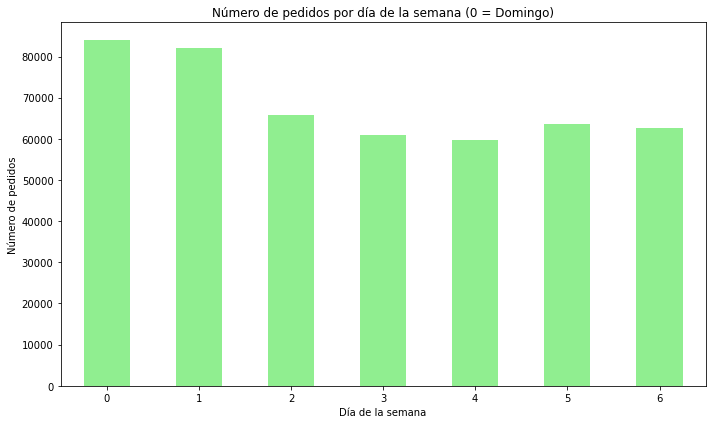

In [38]:
plt.figure(figsize=(10,6))
ordenes_por_dia = df_io['order_dow'].value_counts().sort_index()
ordenes_por_dia.plot(kind='bar', color= 'lightgreen')
plt.title('Número de pedidos por día de la semana (0 = Domingo)')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
El número de pedidos de la semana es en general estable entre los 60,000 pedidos pero sube hasta 80,000 el domingo manteniendose entre esa cifra hasta el lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

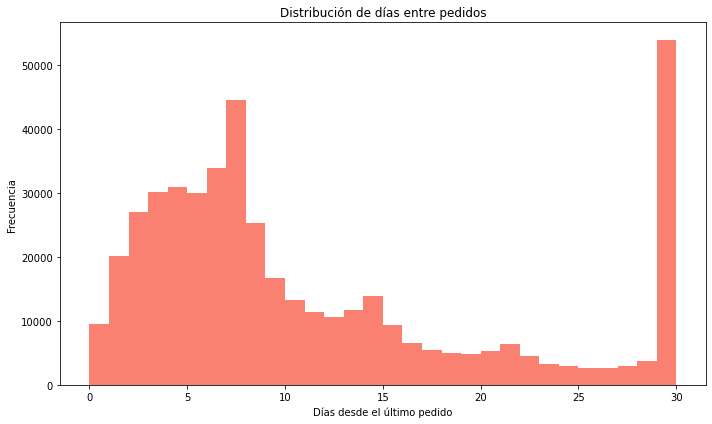

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


In [39]:
plt.figure(figsize=(10,6))
df_io['days_since_prior_order'].dropna().plot(kind='hist', bins=30, color= 'salmon')
plt.title('Distribución de días entre pedidos')
plt.xlabel('Días desde el último pedido')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print(df_io['days_since_prior_order'].describe())


Escribe aquí tus conclusiones. Al parecer la gráfica muestra que hay un una ventana entre 0 y 10 días donde las personas suelen frecuentemente comprar, por otra parte una alta mayoría de usuarios no regresa a comprar de nuevo hasta los 30 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
orders_mi =df_io[df_io['order_dow'] == 3]['order_hour_of_day']

In [41]:
orders_sab = df_io[df_io['order_dow'] == 6]['order_hour_of_day']

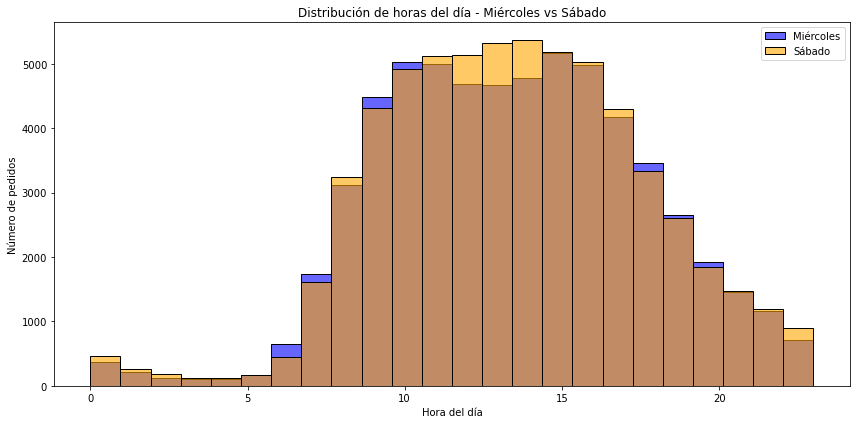

In [42]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(orders_mi, label= 'Miércoles', kde= False, bins=24, color='blue', alpha=0.6)
sns.histplot(orders_sab, label= 'Sábado', kde= False, bins=24, color= 'orange', alpha=0.6)
plt.title('Distribución de horas del día - Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend()
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
Ambas distribuciones se siguen cercanamente sin embargo, es el sábado ente las 10 y las 15 horas donde se lleva por amplia diferencia la mayoría de número de pedidos. Que en comparación con el número de pedidos totales por día se observa claramente la diferencia por esta mayoría de número de pedidos.Pese a que hubo otras horas donde el miércoles presentaban más pedidos que en sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

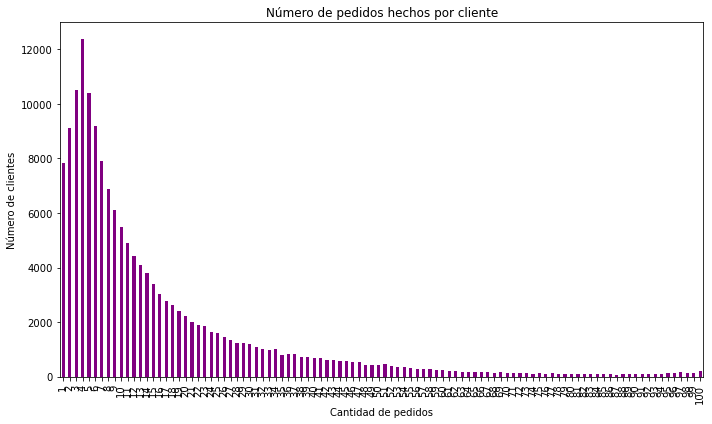

In [43]:
usuario_pedidos = df_io.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,6))
usuario_pedidos.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Número de pedidos hechos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones.
Con la gráfica podemos observar que apartir del artículo no.40 (incluso antes, en el artículo no.30 va a la baja en número de clientes, siendo 4 pedidos el valor más alto que hacen la mayoría de usuarios, pero entre una larga mayoría hace de 1 a 10 pedidos.  

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
top_products = df_op['product_id'].value_counts().head(20)

In [45]:
top_products_named = top_products.reset_index().merge(df_p, left_on='index', right_on='product_id')[['product_id_x', 'product_name','product_id_y']]
#df_p.info()
#print(top_products)
#top_products_named.info()

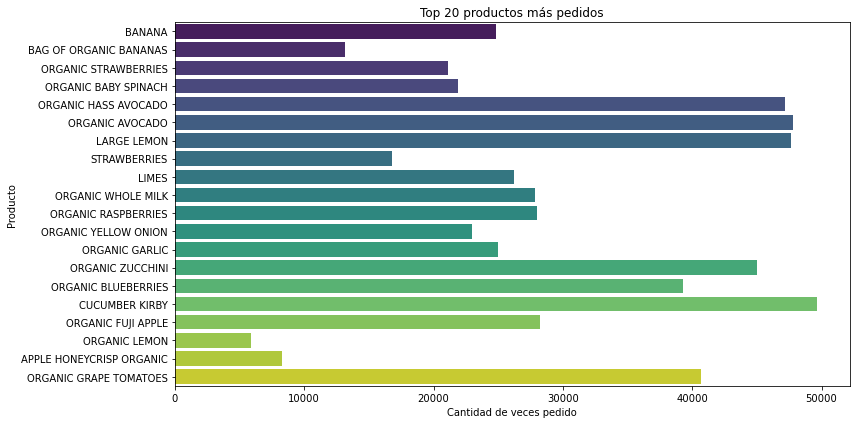

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_id_y', y='product_name', data= top_products_named, palette='viridis')
plt.title('Top 20 productos más pedidos')
plt.xlabel('Cantidad de veces pedido')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones.
Como se observa los veinte productos más pedidos son productos de verdulería. En particular el 'Cucumber kirby', 'organic baby spinach' y 'Avocado', también 'Organic grape tomatoes' figura bastante en los 20 productos más vendidos, se podría especular que al ser el departamento con productos más perecederos la gente tiende a elegirlos, pues se encuentran en constante renovación.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
item_per_order = df_op.groupby('order_id')['product_id'].count()

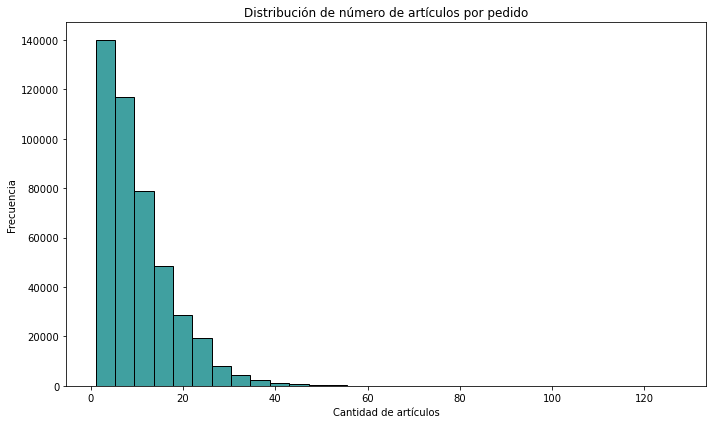

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(item_per_order, bins=30, color='teal')
plt.title('Distribución de número de artículos por pedido')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones. En la gráfica se observa que muy poca gente sobrepasa los 40 artículos en su pedido, y normalmente su compra, reafirmando lo que habíamos observado anteriormente, sobre los prímeros 10 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
reordered_products = df_op[df_op['reordered']==1]
top_reordered = reordered_products['product_id'].value_counts().head(20)
top_reordered_named = top_reordered.reset_index().merge(df_p, left_on='index', right_on='product_id')[['product_id_x','product_name','product_id_y']] 
#reordered_products.info()
#print(top_reordered)
top_reordered_named.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id_x  20 non-null     int64 
 1   product_name  20 non-null     object
 2   product_id_y  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


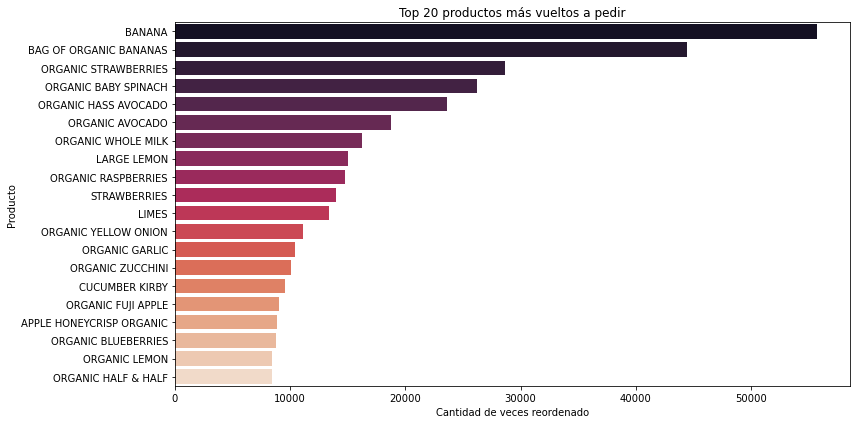

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_id_x', y='product_name', data=top_reordered_named, palette= 'rocket')
plt.title('Top 20 productos más vueltos a pedir')
plt.xlabel('Cantidad de veces reordenado')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones. Al analizar lo anterior sobre los productos más vendidos nos da una idea del producto más vendido en este analisis nos enteramos del producto más popular entre los clientes pues tienden a repetir su compra, tienen por lo tanto una excelente estima en productos como 'Banana'y 'Strawberries'. Al igual que en los productos bajo la descripción orgánico, la cuál parece gustarle mucho a los usuarios.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
#Tasa de repetición por producto
product_reorder_ratio = df_op.groupby('product_id')['reordered'].mean()

In [52]:
product_reorder_ratio.name = 'reorder_rate'

In [53]:
print(product_reorder_ratio)
product_reorder_ratio.describe()

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reorder_rate, Length: 45573, dtype: float64


count    45573.000000
mean         0.386707
std          0.272132
min          0.000000
25%          0.166667
50%          0.408163
75%          0.575758
max          1.000000
Name: reorder_rate, dtype: float64

Escribe aquí tus conclusiones. Con una descripción de los datos en promedio 0.38 productos se repiten en la compra de los usuarios. Y Entre el 2do y 3er quartil se nota que hay una inclinación entre 0.40 y 0.50 de los datos, indicando que de media una persona repite entre estos valores sus productos determinante en el compromiso que se establece entre una marca y los clientes. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
user_reorder_rate = df_op.groupby(['order_id','product_id'])['reordered'].sum().reset_index()
user_orders = df_io[['order_id','user_id']]
user_reordered = user_reorder_rate.merge(user_orders, on= 'order_id')
user_reorder_ratio = user_reordered.groupby('user_id')['reordered'].mean()

In [55]:
print(user_reorder_ratio)
user_reorder_ratio.describe()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: reordered, dtype: float64

Escribe aquí tus conclusiones. Entre los usuarios de promedio el 0.49 repite sus productos que ya ha adquirido, y muy fuertemente repetirá la compra si ya realizó una anteriormente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
first_in_cart = df_op[df_op['add_to_cart_order']==1]
first_counts = first_in_cart['product_id'].value_counts().head(20)
first_named = first_counts.reset_index().merge(df_p, left_on = 'index', right_on ='product_id')[['product_id_x','product_name','product_id_y']]

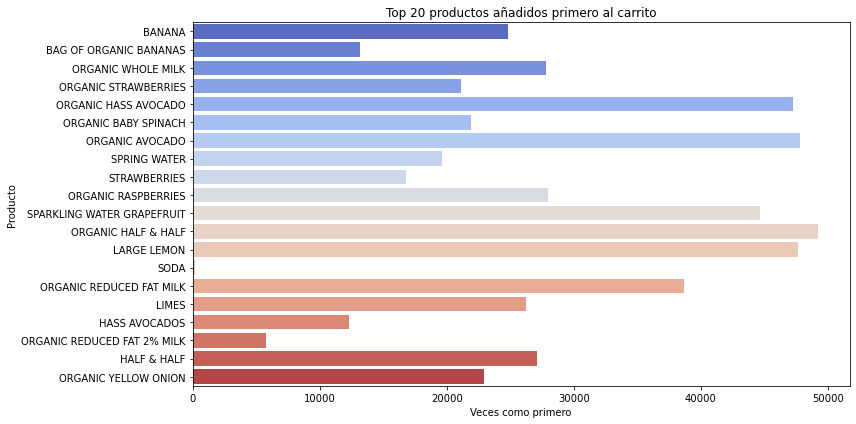

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_id_y', y='product_name', data=first_named, palette='coolwarm')
plt.title('Top 20 productos añadidos primero al carrito')
plt.xlabel('Veces como primero')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones. En el top de productos se puede observar que el producto 'organic half & half' es el principal producto añadido al carrito, seguido del aguacate, y sprarkling water, en su conjunto muestra las primeras decisiones de compra de los usuarios en un marco general. 

### Conclusion general del proyecto:

Analizar los datos de comprar de los usuarios es importe porque se obtienen resultados cercanos a la realidad y al comportamiento del consumidor. Dichos resultados pueden favorecer campañas de marketing para afianzar la fidelidad de los usuarios hacia las marcas, o inclusive saber que tan comprobable es que un usuario acepte un nuevo producto en el mercado y sobre que características se deben de basar los diseños de investigación y desarrollo.